In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:
cognitive = pd.read_csv('BIIICss_patients.csv')
cognitive.head()

,Unnamed: 0,index,PNG_Path,PatientID,Guitar,Guitar_BBOX,CSP,CSP_BBOX,2nd_Filter,PNG_Name,Key_Points,ThalamusDiameter,gestage,birthweight,BIIICss,BIIIRss,BIIIEss
0,2,4,/mnt/Ben/TD-Measuring/Implementation/Images//P...,187.0,0.999705,[415;220;222;205],NaN,NaN,Guitar,P0187_morph1_00000056.png,[390.2525939941406;391.0625;428.380859375;242....,1.829664,263.0,3170.0,12.0,13.0,12.0
1,5,7,/mnt/Ben/TD-Measuring/Implementation/Images//P...,323.0,0.886847,[495;257;192;177],NaN,NaN,Guitar,P0323_morph1_0000002E.png,[532.677734375;431.4225158691406;505.320953369...,1.683674,256.0,2910.0,13.0,13.0,NaN
2,11,13,/mnt/Ben/TD-Measuring/Implementation/Images//P...,112.0,0.998660,[352;253;233;204],NaN,NaN,Guitar,P0112_morph1_00000028.png,[384.171875;294.8385314941406;393.234375;438.3...,1.756738,273.0,3610.0,7.0,7.0,10.0
3,12,14,/mnt/Ben/TD-Measuring/Implementation/Images//P...,748.0,0.999772,[335;241;263;240],NaN,NaN,Guitar,P0748_morph1_0000000E.png,[378.1549377441406;455.16796875;337.2174377441...,1.879344,289.0,3900.0,9.0,12.0,9.0
4,16,19,/mnt/Ben/TD-Measuring/Implementation/Images//P...,281.0,0.999836,[413;229;248;220],NaN,NaN,Guitar,P0281_morph1_00000028.png,[637.0045776367188;283.021484375;612.883483886...,1.835604,260.0,2990.0,13.0,14.0,17.0


In [9]:
Bayley = cognitive[['BIIICss','BIIIRss','BIIIEss']]
Bayley.columns = ['Cognitive','Receptive Language','Expressive Language']

In [11]:
Bayley.corr().style.background_gradient(cmap='Purples')

,Cognitive,Receptive Language,Expressive Language
Cognitive,1.000000,0.526815,0.520141
Receptive Language,0.526815,1.000000,0.627396
Expressive Language,0.520141,0.627396,1.000000


In [17]:
statistics = Bayley.describe().round(1)
statistics

,Cognitive,Receptive Language,Expressive Language
count,314.0,261.0,250.0
mean,10.8,11.7,12.0
std,2.0,1.9,2.4
min,7.0,5.0,6.0
25%,9.0,11.0,11.0
50%,10.0,12.0,12.0
75%,12.0,13.0,13.0
max,18.0,17.0,19.0


In [7]:
# calculated the mean - 1std and mean + 1std
statistics['BIIIRss']['mean']-1*statistics['BIIIRss']['std'], statistics['BIIIRss']['mean']+1*statistics['BIIIRss']['std']

(9.76, 13.58)

In [8]:
statistics['BIIIEss']['mean']-1*statistics['BIIIEss']['std'], statistics['BIIIEss']['mean']+1*statistics['BIIIEss']['std']

(9.620000000000001, 14.34)

In [9]:
(Bayley<=9.76).sum()/len(Bayley)*100

BIIICss    26.433121
BIIIRss     7.324841
BIIIEss    10.191083
dtype: float64

Change the Bayley score to catogorical: <mean-1sd is considered as abnormal; For BIIICss, according to the reference, at 24month, score under 10 is considered as at risk

In [10]:
normalized_data = pd.read_csv('normalized_feature_regression.csv')
thalamus = pd.read_csv('thalamus_feature_regression.csv')

In [10]:
normalized_data.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,img_name,ThalamusDiameter,gestage,birthweight,BIIICss,BIIIRss,BIIIEss
0,0.000000,0.909091,0.269524,0.631531,1.625000,0.478382,0.611940,0.931239,0.920346,0.000000,...,1.111840,0.776599,1.209950,P0006_morph1_0000000D.png,1.837605,280.0,3520.0,11.0,11.0,7.0
1,0.000000,1.470588,0.901686,2.306074,2.166667,0.745679,1.102564,1.480720,1.491054,1.000000,...,1.243257,1.453139,1.159204,P0015_morph1_0000000A.png,1.886982,252.0,2750.0,11.0,NaN,12.0
2,0.083333,0.322917,0.062617,0.368451,0.263158,2.905412,0.495868,0.350758,0.277235,0.177778,...,0.734673,0.191408,1.882688,P0020_morph1_00000001.png,1.921918,280.0,3175.0,16.0,16.0,15.0
3,inf,0.842105,0.185012,1.112407,0.764706,0.916183,0.714286,0.761554,1.327636,1.416667,...,1.737432,1.817935,1.482688,P0020_morph1_00000002.png,1.700615,280.0,3175.0,16.0,16.0,15.0
4,inf,1.717949,0.966781,2.019003,1.823529,1.420889,1.986111,1.531226,2.517518,3.875000,...,1.965719,7.107370,0.978049,P0020_morph1_00000003.png,1.806750,280.0,3175.0,16.0,16.0,15.0


In [13]:
def categorize_C(value):
    if value<10:
        return 'abnormal'
    else:
        return 'normal'
def categorize_R(value):
    if value<12:
        return 'abnormal'
    else:
        return 'normal'
normalized_data_cat_C = normalized_data[['BIIICss']].applymap(categorize_C)
normalized_data_cat_C.head()

/var/folders/h0/t9wwqcm97tg7_g56jrr_9pz40000gn/T/ipykernel_71472/242630933.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  normalized_data_cat_C = normalized_data[['BIIICss']].applymap(categorize_C)


,BIIICss
0,normal
1,normal
2,normal
3,normal
4,normal


In [14]:
normalized_data_cat_R = normalized_data[['BIIIRss','BIIIEss']].applymap(categorize_R)

/var/folders/h0/t9wwqcm97tg7_g56jrr_9pz40000gn/T/ipykernel_71472/4119964628.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  normalized_data_cat_R = normalized_data[['BIIIRss','BIIIEss']].applymap(categorize_R)


In [15]:
normalized_data_cat = pd.concat([normalized_data_cat_C,normalized_data_cat_R],axis=1)
normalized_data_cat.head()

,BIIICss,BIIIRss,BIIIEss
0,normal,abnormal,abnormal
1,normal,normal,normal
2,normal,normal,normal
3,normal,normal,normal
4,normal,normal,normal


In [16]:
# create a new column to evaluate the comprehensive language ability
normalized_data_cat['Language Ability'] = np.where((normalized_data_cat['BIIIRss'] == 'abnormal') | (normalized_data_cat['BIIIEss'] == 'abnormal'), 'abnormal', 'normal')

In [17]:
normalized_data[['BIIICss','BIIIRss','BIIIEss','Language Ability']] = normalized_data_cat[['BIIICss','BIIIRss','BIIIEss','Language Ability']]
thalamus[['BIIICss','BIIIRss','BIIIEss','Language Ability']] = normalized_data_cat[['BIIICss','BIIIRss','BIIIEss','Language Ability']]

In [19]:
normalized_data.to_csv('normalized_echogenicity_cat.csv',index=False)
thalamus.to_csv('thalamus_echogenicity_cat.csv',index=False)

# EDA of echogenicity feature and Bayley III

In [19]:
normalized_data = pd.read_csv('normalized_feature_regression.csv')
thalamus = pd.read_csv('thalamus_feature_regression.csv')

In [20]:
# Drop unwanted columns
normalized_data = normalized_data.drop(columns=['img_name',
       'ThalamusDiameter', 'gestage'], axis=1)

In [21]:
thalamus = thalamus.drop(columns=['img_name',
       'ThalamusDiameter', 'gestage'], axis=1)

In [22]:
normalized_data.head()
thalamus.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,birthweight,BIIICss,BIIIRss,BIIIEss
0,0.0,20.0,77664,0.319064,13.0,3.900235,41,7.470333,6.447574,0,...,69.261346,63.832942,0.956573,0.021337,0.035045,0.017910,3520.0,11.0,11.0,7.0
1,0.0,25.0,135105,0.501164,13.0,4.136352,43,8.151758,8.079046,3,...,79.813049,61.359473,0.917189,0.020988,0.035075,0.017467,2750.0,11.0,NaN,12.0
2,1.0,31.0,198419,0.819558,15.0,5.318450,60,10.001134,13.720217,8,...,90.346570,55.730646,0.858002,0.025632,0.062125,0.017881,3175.0,16.0,16.0,15.0
3,6.0,32.0,188462,1.014456,13.0,5.102134,65,8.834914,19.667606,17,...,90.529577,45.967371,0.794757,0.035199,0.111510,0.020570,3175.0,16.0,16.0,15.0
4,12.0,67.0,937306,1.902161,31.0,6.080969,143,18.822240,36.614737,31,...,189.286316,26.520529,0.487980,0.036750,0.311790,0.013486,3175.0,16.0,16.0,15.0


In [29]:
normalized_data_corr = normalized_data.corr()[['BIIICss','BIIIRss','BIIIEss']].sort_values(by = 'BIIICss',ascending=False)

In [51]:
normalized_data_corr= normalized_data_corr.drop(['BIIICss','BIIIRss','BIIIEss'],axis=0)

In [63]:
top_5_BIIICss = normalized_data_corr['BIIICss'].nlargest(5)
top_5_BIIIRss = normalized_data_corr['BIIIRss'].nlargest(5)
top_5_BIIIEss = normalized_data_corr['BIIIEss'].nlargest(5)

In [64]:
pd.DataFrame(top_5_BIIICss)

,BIIICss
original_gldm_SmallDependenceEmphasis,0.141460
original_glszm_SmallAreaLowGrayLevelEmphasis,0.123590
original_glszm_ZonePercentage,0.108832
original_gldm_HighGrayLevelEmphasis,0.093200
original_glcm_Autocorrelation,0.091881


In [65]:
pd.DataFrame(top_5_BIIIEss)

,BIIIEss
original_firstorder_Skewness,0.169802
original_glrlm_RunLengthNonUniformityNormalized,0.137228
original_glszm_ZonePercentage,0.131677
original_glrlm_ShortRunHighGrayLevelEmphasis,0.126359
original_glrlm_ShortRunEmphasis,0.123232


In [66]:
pd.DataFrame(top_5_BIIIRss)

,BIIIRss
original_glcm_ClusterShade,0.121758
original_firstorder_Skewness,0.118287
original_glcm_Imc1,0.112883
original_firstorder_Variance,0.109593
original_glrlm_ShortRunHighGrayLevelEmphasis,0.108105


<Axes: >

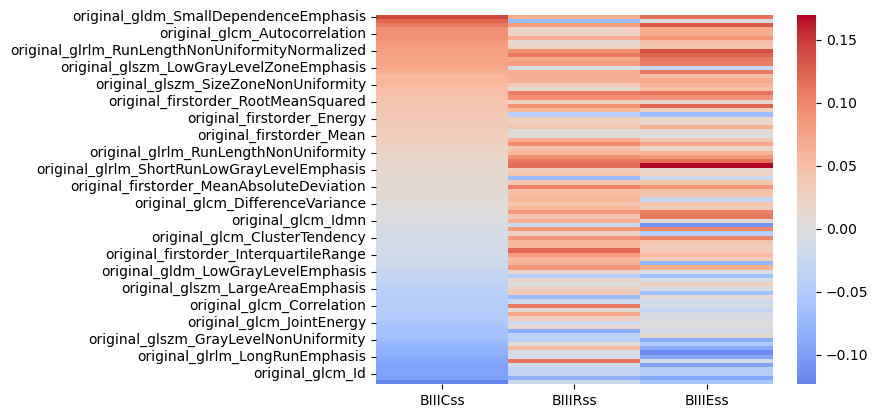

In [38]:
sns.heatmap(normalized_data_corr[3:], cmap='coolwarm', center=0,fmt=".2f")

In [35]:
thalamus_corr = thalamus.corr()[['BIIICss','BIIIRss','BIIIEss']].sort_values(by = 'BIIICss',ascending=False)

### Heat map for the original thalamus echogenicity

In [67]:
thalamus_corr= thalamus_corr.drop(['BIIICss','BIIIRss','BIIIEss'],axis=0)
top_thalamus_BIIICss = thalamus_corr['BIIICss'].nlargest(5)
top_thalamus_BIIIRss = thalamus_corr['BIIIRss'].nlargest(5)
top_thalamus_BIIIEss = thalamus_corr['BIIIEss'].nlargest(5)

In [68]:
pd.DataFrame(top_thalamus_BIIICss)

,BIIICss
original_glszm_ZonePercentage,0.131006
original_gldm_SmallDependenceEmphasis,0.127455
original_glcm_Imc1,0.120276
original_gldm_SmallDependenceLowGrayLevelEmphasis,0.106094
original_glrlm_RunPercentage,0.085570


In [70]:
pd.DataFrame(top_thalamus_BIIIEss)

,BIIIEss
original_gldm_SmallDependenceLowGrayLevelEmphasis,0.160312
original_gldm_LowGrayLevelEmphasis,0.128103
original_gldm_LargeDependenceLowGrayLevelEmphasis,0.117537
original_glrlm_ShortRunLowGrayLevelEmphasis,0.116431
original_glrlm_LowGrayLevelRunEmphasis,0.106783


In [71]:
pd.DataFrame(top_thalamus_BIIIRss)

,BIIIRss
original_glcm_ClusterProminence,0.140289
original_glcm_ClusterShade,0.139493
original_gldm_SmallDependenceLowGrayLevelEmphasis,0.117445
original_gldm_LowGrayLevelEmphasis,0.096556
original_gldm_LargeDependenceLowGrayLevelEmphasis,0.088057


<Axes: >

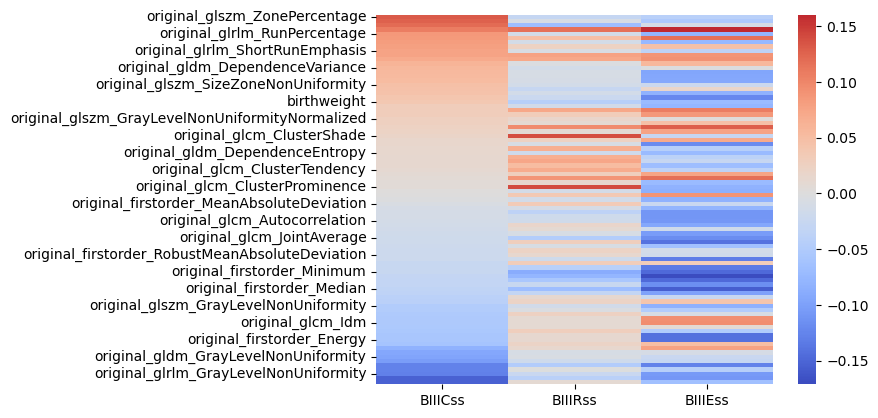

In [37]:
sns.heatmap(thalamus_corr[3:], annot=False, cmap='coolwarm',center=0, fmt=".2f")

## Correlation between TD & TD/HC and BayleyIII score

In [5]:
fulldata = pd.read_excel('fulldata_regression.xlsx')

In [6]:
fulldata.columns

Index(['PNG_Path', 'PatientID', 'PNG_Name', 'ThalamusDiameter_x',
       'Head Circumference', 'GA (HC)', 'Cerebellum Diameter', 'GA (CD)',
       'GA (BIS)', 'Gender',
       ...
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'img_name',
       'ThalamusDiameter_y', 'gestage', 'birthweight', 'BIIICss', 'BIIIRss',
       'BIIIEss'],
      dtype='object', length=113)

In [8]:
fulldata = fulldata[['ThalamusDiameter_x', 'TD:HC','BIIICss', 'BIIIRss', 'BIIIEss']]

In [10]:
fulldata_corr = fulldata.corr()[['BIIICss','BIIIRss','BIIIEss']].sort_values(by = 'BIIICss',ascending=False)

In [13]:
fulldata_corr= fulldata_corr.drop(['BIIICss','BIIIRss','BIIIEss'],axis=0)

<Axes: >

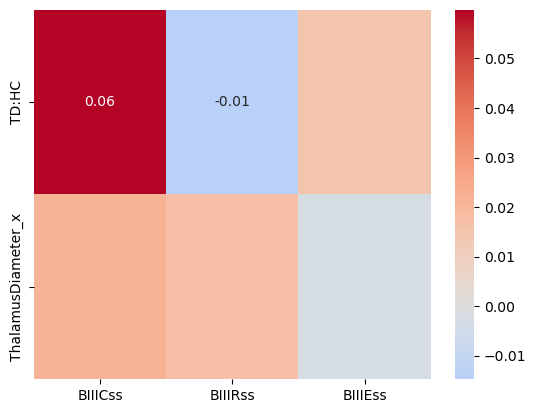

In [14]:
sns.heatmap(fulldata_corr, annot=True, cmap='coolwarm',center=0, fmt=".2f")